In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data/dataset/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
print(os.listdir('./data/dataset/input/skin-cancer-mnist-ham10000'))

['HAM10000_segmentations_lesion_tschandl', 'ham10000_images_part_2', 'hmnist_8_8_RGB.csv', 'ham10000_images_part_1', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_28_28_RGB.csv', 'hmnist_28_28_L.csv', 'hmnist_8_8_L.csv']


In [16]:
#Matching the row info in HAM10000_metadata with corresponding images
img_dir = './data/dataset/input/skin-cancer-mnist-ham10000'
image_path = glob(os.path.join(img_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in image_path}

In [17]:
# segmentation image path

# 세그멘테이션 이미지 경로에 대한 포맷을 정의합니다.
segmentation_dir = './data/dataset/input/skin-cancer-mnist-ham10000/HAM10000_segmentations_lesion_tschandl'
unet_dir = "/home/suyeon/code/capstone3/DL/image/lesion_parts"


In [18]:
df = pd.read_csv('./data/dataset/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

In [19]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [20]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [21]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [22]:

df['cell_type'] = df['dx'].map(lesion_type_dict.get)
# 'image_id'를 이용하여 세그멘테이션 이미지의 경로를 생성하고 'segment' 열에 추가합니다.
df['segment'] = df['image_id'].apply(lambda x: os.path.join(segmentation_dir, f"{x}_segmentation.png"))
df['image'] = df['image_id'].map(imageid_path_dict.get)
# u-net
# df['image'] = df['image_id'].apply(lambda x: os.path.join(unet_dir,f"{x}.jpg"))
### Returns categorical values and turns them into integer codes
df['label'] = pd.Categorical(df['cell_type']).codes

In [36]:
df.loc[df['dx'] == 'vasc']

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,segment,image,label
2320,HAM_0006889,ISIC_0031197,vasc,histo,20.0,male,upper extremity,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2321,HAM_0006889,ISIC_0031270,vasc,histo,20.0,male,upper extremity,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2322,HAM_0001920,ISIC_0029486,vasc,histo,55.0,male,back,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2323,HAM_0001920,ISIC_0031901,vasc,histo,55.0,male,back,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2324,HAM_0005155,ISIC_0032076,vasc,histo,85.0,male,lower extremity,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
...,...,...,...,...,...,...,...,...,...,...,...
2457,HAM_0000415,ISIC_0025680,vasc,consensus,55.0,female,trunk,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2458,HAM_0004413,ISIC_0026068,vasc,consensus,55.0,female,abdomen,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2459,HAM_0004257,ISIC_0025452,vasc,consensus,55.0,female,abdomen,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5
2460,HAM_0003829,ISIC_0026349,vasc,consensus,60.0,female,trunk,Vascular lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,5


In [24]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,segment,image,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2


In [25]:
df.shape

(10015, 11)

In [26]:
label={
    ' Actinic keratoses':0,
    'Basal cell carcinoma':1,
    'Benign keratosis-like lesions':2,
    'Dermatofibroma':3,
    'Melanocytic nevi':4,
    'Vascular lesions':5,
    'Melanoma':6,
}

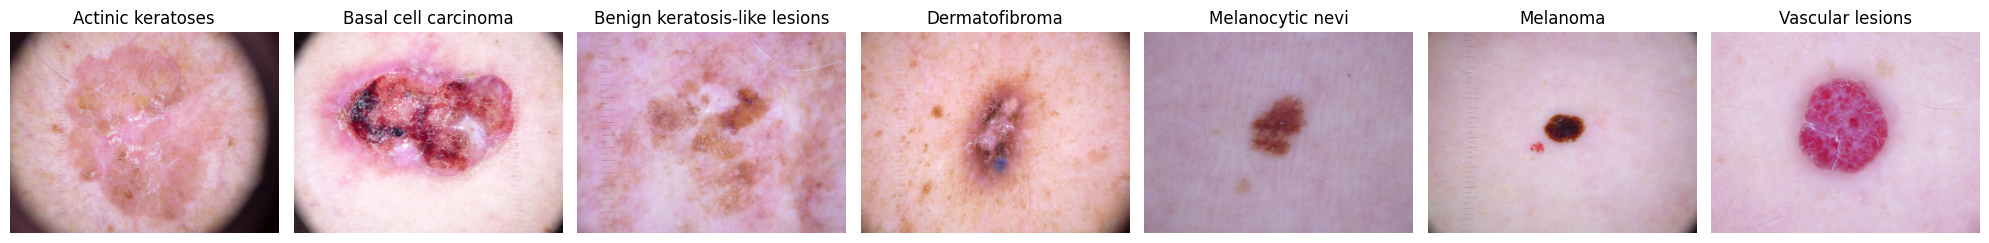

In [27]:

label_dict = {
    'Actinic keratoses': 0,
    'Basal cell carcinoma': 1,
    'Benign keratosis-like lesions': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevi': 4,
    'Vascular lesions': 5,
    'Melanoma': 6,
}

# 레이블의 역매핑 생성
reverse_label_dict = {v: k for k, v in label_dict.items()}

# 각 레이블에 대한 대표 이미지 선택
representative_images = df.drop_duplicates(subset='label', keep='first')


# 레이블 이름으로 정렬
representative_images = representative_images.assign(label_name=representative_images['label'].map(reverse_label_dict))
representative_images = representative_images.sort_values(by='label_name').reset_index(drop=True)

fig, axes = plt.subplots(nrows=1, ncols=len(label_dict), figsize=(20, 5))

for idx, (index, row) in enumerate(representative_images.iterrows()):
    image_path = row['image']
    img_label = row['label_name']
    
    img = mpimg.imread(image_path)  # 이미지 경로가 실제로 존재해야 합니다.
    axes[idx].imshow(img)
    axes[idx].set_title(f"{img_label}")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [28]:
# 레이블별 데이터 개수 계산
label_counts = df['label'].value_counts()

# 레이블 이름으로 변환하여 출력
for label_num, count in label_counts.iteritems():
    print(f"{reverse_label_dict[label_num]}: {count}")

KeyError: 'nv'

In [30]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [13]:
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
cell_type        0
segment          0
image            0
label            0
dtype: int64

In [14]:
## We replace the null values with mean age
df['age'].fillna((df['age'].mean()), inplace = True)

In [60]:
df.to_csv("./data/dataset/train_unet.csv")

Visualizing the images

In [19]:
img_data = pd.read_csv('./data/dataset/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [20]:
img_data.sample(10)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
7675,95,88,84,127,119,112,147,137,130,156,...,140,126,125,127,114,110,108,97,92,4
7444,163,131,158,167,135,162,171,138,166,177,...,167,141,168,162,137,164,155,128,154,4
5294,241,160,178,239,160,178,240,163,180,245,...,230,163,167,229,162,168,227,162,166,4
7979,141,133,148,158,150,169,162,153,172,167,...,169,157,175,166,155,174,164,154,176,4
7636,160,158,153,165,161,158,171,166,166,175,...,128,109,118,125,106,114,119,98,106,4
5979,236,154,164,238,156,166,240,159,170,239,...,230,164,164,229,163,164,225,160,159,4
7412,177,159,159,180,164,162,183,168,165,185,...,173,157,154,170,154,151,166,149,144,4
6970,170,169,191,175,174,198,176,178,206,179,...,165,162,171,165,160,169,152,150,157,4
3166,204,121,156,207,125,159,208,130,161,211,...,204,132,152,207,139,161,208,143,162,4
4018,196,93,83,204,106,102,205,112,105,210,...,201,124,106,202,124,105,202,126,108,4


In [22]:
## Rescale the images
img_rescale = img_data/255

In [23]:
img_rescale.shape

(10015, 2353)

In [24]:
## Number of null values
img_rescale.isnull().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

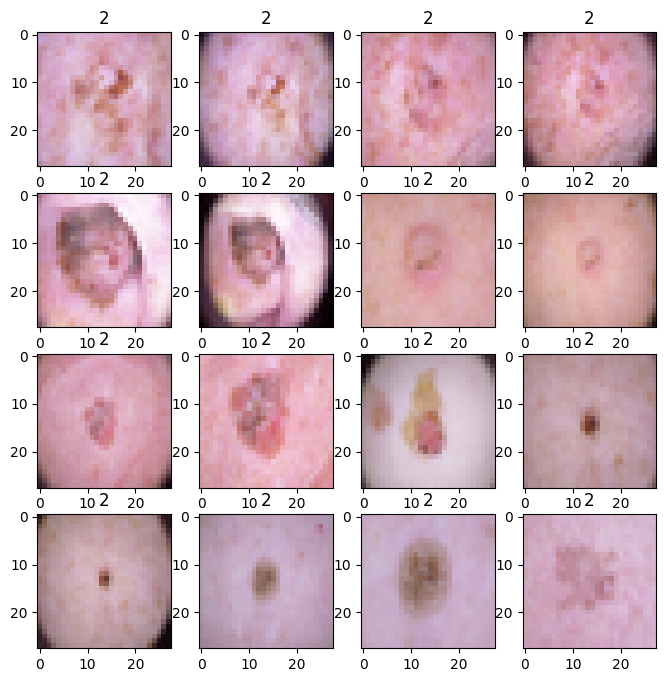

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(img_rescale.iloc[i, :2352].values.reshape(28,28,3))
    plt.title(img_data.iloc[i,2352])
    

In [18]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,segment,image,label
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,./data/dataset/input/skin-cancer-mnist-ham1000...,./data/dataset/input/skin-cancer-mnist-ham1000...,2


In [17]:
df.to_csv("./data/dataset/train.csv")